In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/linear regression/Bike sharing assignment/day.csv")

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df.shape

(730, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
df.isnull().mean()

,0
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0


In [ ]:
df.nunique()

,0
instant,730
dteday,730
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,498


## EDA

In [ ]:
# Drop unnecessary column

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [ ]:
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
df.shape

(730, 12)

In [ ]:
# Change all ctegorical data

df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'clear',2:'mist',3:'light_rain',4:'heavy_rain'},inplace = True)

df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

<ipython-input-13-f1294186852c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
<ipython-input-13-f1294186852c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
num_cols = ['temp','atemp','hum','windspeed','cnt']

<Axes: >

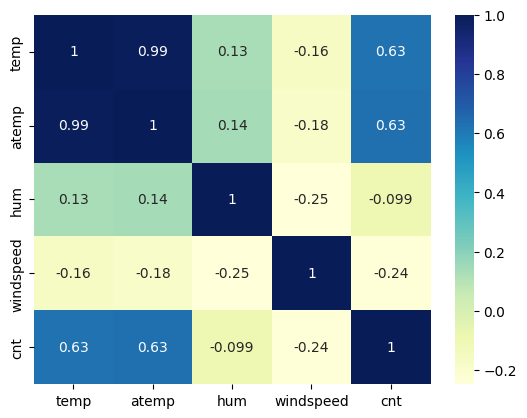

In [ ]:
# Plot Heatmap

sns.heatmap(df[num_cols].corr(),cmap="YlGnBu",annot=True)

<Figure size 1500x3000 with 0 Axes>

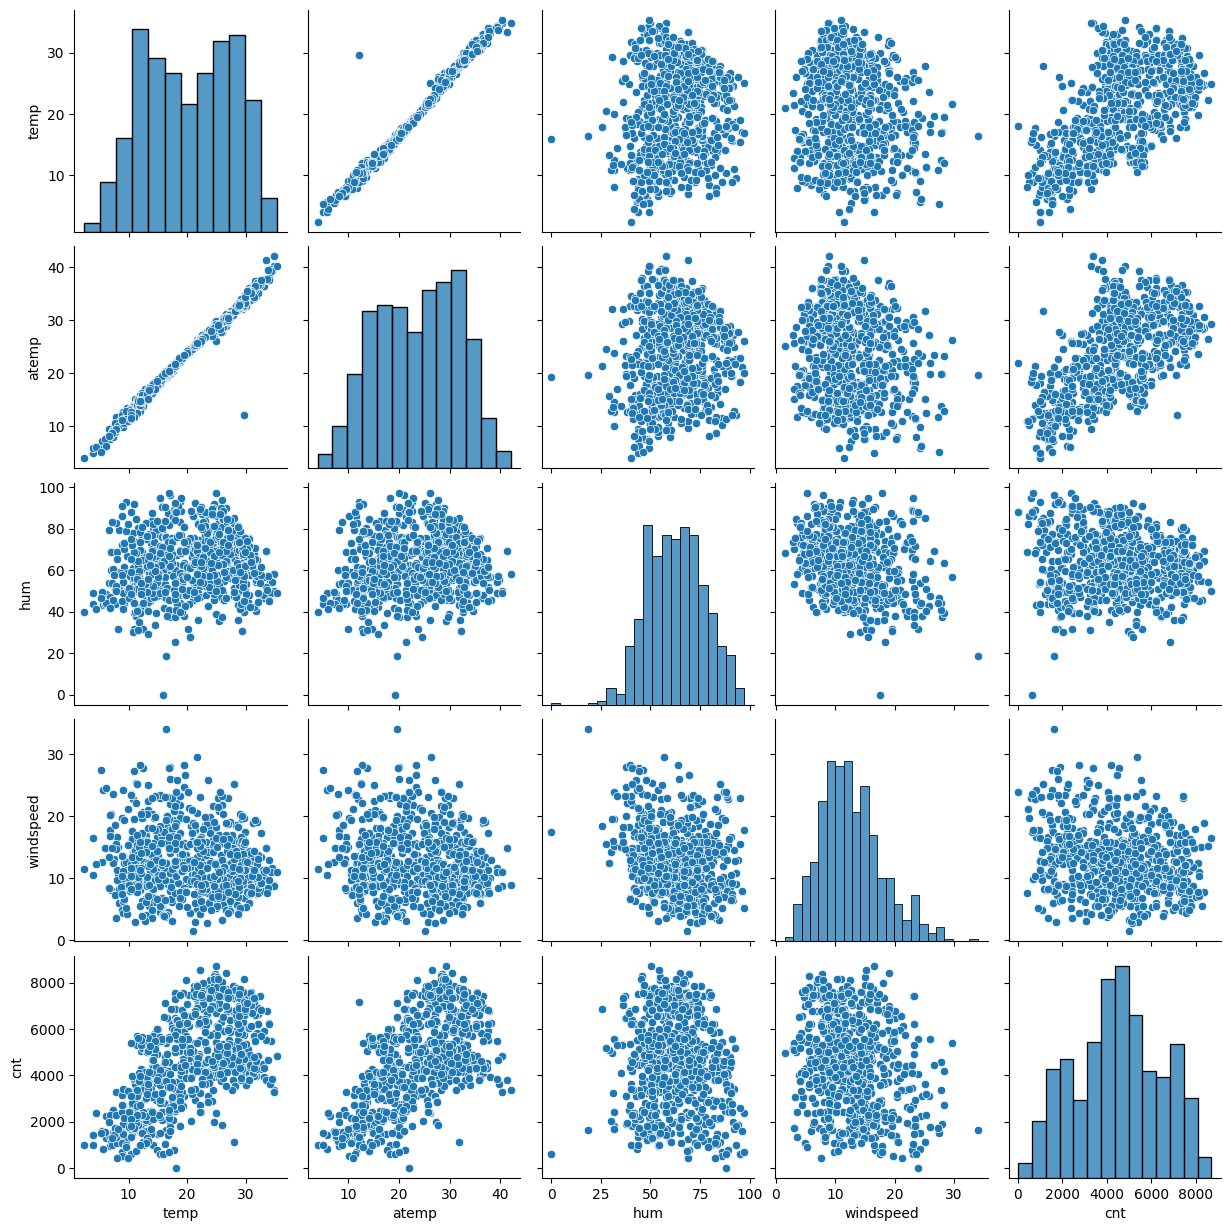

In [ ]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=num_cols)
plt.show()

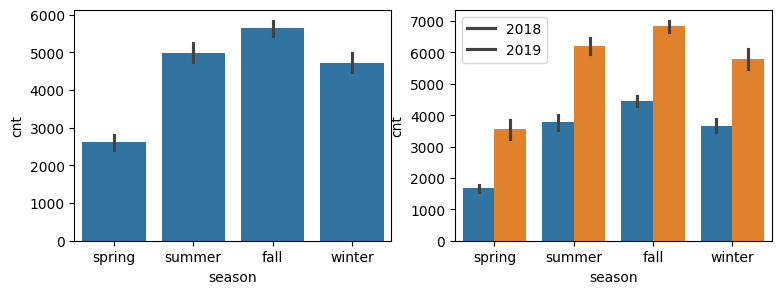

In [ ]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.barplot(x='season',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='season',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

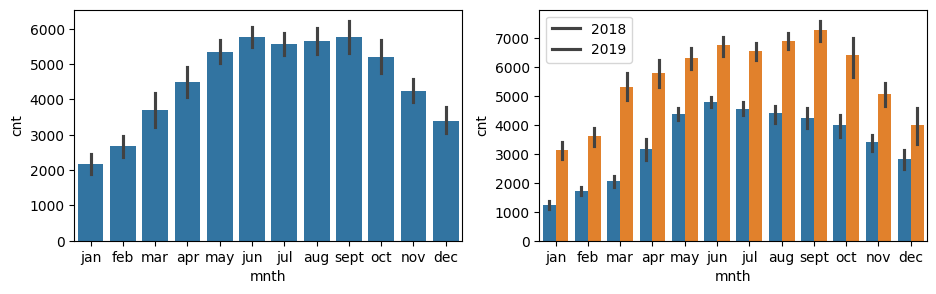

In [ ]:
plt.figure(figsize = (11,3))
plt.subplot(1,2,1)
sns.barplot(x='mnth',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='mnth',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

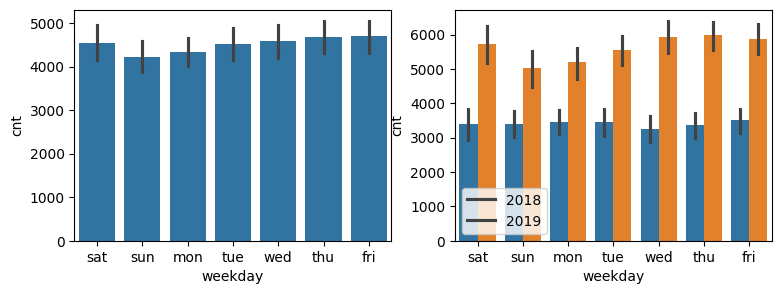

In [ ]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.barplot(x='weekday',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='weekday',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

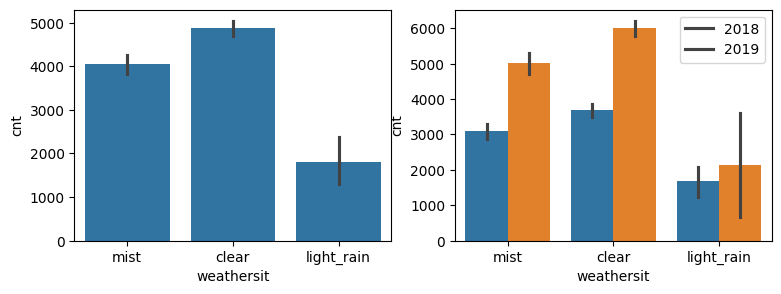

In [ ]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.barplot(x='weathersit',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='weathersit',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

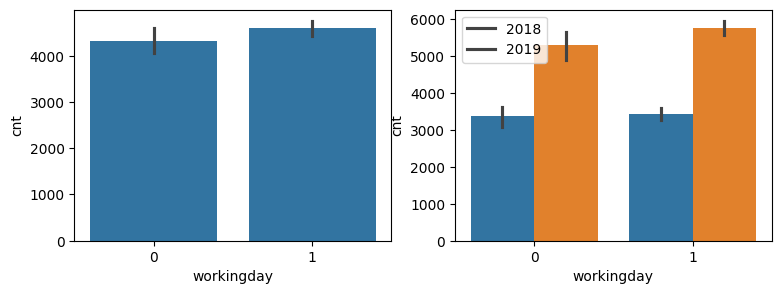

In [ ]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.barplot(x='workingday',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='workingday',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

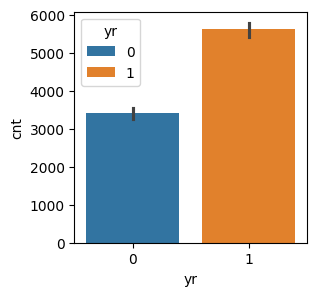

In [ ]:
plt.figure(figsize = (3,3))
sns.barplot(x='yr',y='cnt',data=df, hue='yr')
plt.show()

## Creating Dummy Variables

In [ ]:
df1=pd.get_dummies(df,columns=["season","mnth","weekday","weathersit"],drop_first=True,dtype=int)

In [ ]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df1.shape

(730, 30)

## Splitting data into Train - Test


In [ ]:
X=df1.drop(['cnt'],axis=1)
y=df1['cnt']

In [ ]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_light_rain', 'weathersit_mist'],
      dtype='object')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


## Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
num_cols = ['temp','atemp','hum','windspeed']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## RFE

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', False, 10),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 7),
 ('mnth_mar', False, 6),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 15),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 14),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist', True, 1)]

In [ ]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_oct', 'mnth_sept', 'weekday_sat', 'weathersit_light_rain',
       'weathersit_mist'],
      dtype='object')

In [ ]:
selected_features=X_train.columns[rfe.support_]

In [ ]:
X_train= X_train[selected_features]
X_test= X_test[selected_features]

In [ ]:
print(X_train.shape)
print(X_test.shape)

(511, 15)
(219, 15)


## Create Model

In [ ]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [ ]:
lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.0
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          8.43e-192
Time:                        16:02:02   Log-Likelihood:                -4114.2
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2218.4427    314.000      7.065      0.000    1601.506    2835.379
yr                     2005.3633     69.481     28.862      0.000    1868.850    2141.877
holiday                -492.7821    233.839     -2.107      0.036    -952.221     -33.343
workingday              387.8169    100.176      3.871      0.000     190.994     584.640
temp                   4443.8683    295.495     15.039      0.000    3863.289    5024.447
hum                   -1425.1898    323.743     -4.402      0.000   -2061.270    -789.109
windspeed             -1593.4345    220.415     -7.229      0.000   -2026.498   -1160.371
season_spring          -538.4411    180.283     -2.987      0.003    -892.655    -184.227
season_summer           453.5239    128.401      3.532      0.000     201.246     705.801
season_winter           720.8276    162.589      4.433      0.000     401.377    1040.278
mnth_jul               -451.7098    157.152     -2.874      0.004    -760.477    -142.943
mnth_oct                338.7822    150.289      2.254      0.025      43.498     634.066
mnth_sept               746.8860    143.935      5.189      0.000     464.087    1029.685
weekday_sat             470.6474    126.058      3.734      0.000     222.973     718.322
weathersit_light_rain -2187.5221    227.250     -9.626      0.000   -2634.016   -1741.028
weathersit_mist        -496.4951     90.005     -5.516      0.000    -673.333    -319.657
==============================================================================
Omnibus:                       76.064   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.100
Skew:                          -0.742   Prob(JB):                     3.54e-44
Kurtosis:                       5.682   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.637865
3,temp,17.489262
2,workingday,5.344292
5,windspeed,4.725714
6,season_spring,4.253091
8,season_winter,4.088649
7,season_summer,2.847891
14,weathersit_mist,2.291827
0,yr,2.089130
12,weekday_sat,1.979401


In [ ]:
X_train=X_train.drop("workingday",axis=1)
X_test=X_test.drop("workingday",axis=1)

In [ ]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          9.28e-190
Time:                        16:02:02   Log-Likelihood:                -4121.8
No. Observations:                 511   AIC:                             8274.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2570.8500    304.723      8.437      0.000    1972.143    3169.557
yr                     2005.6616     70.453     28.468      0.000    1867.238    2144.086
holiday                -808.2225    222.253     -3.637      0.000   -1244.896    -371.550
temp                   4480.2614    299.481     14.960      0.000    3891.854    5068.669
hum                   -1502.0720    327.658     -4.584      0.000   -2145.841    -858.303
windspeed             -1614.7630    223.431     -7.227      0.000   -2053.751   -1175.775
season_spring          -541.6657    182.805     -2.963      0.003    -900.834    -182.497
season_summer           450.3150    130.196      3.459      0.001     194.512     706.118
season_winter           715.2311    164.859      4.338      0.000     391.322    1039.140
mnth_jul               -480.1559    159.178     -3.016      0.003    -792.903    -167.409
mnth_oct                313.6377    152.251      2.060      0.040      14.500     612.775
mnth_sept               752.9966    145.941      5.160      0.000     466.257    1039.736
weekday_sat             149.9773     96.354      1.557      0.120     -39.336     339.290
weathersit_light_rain -2121.6186    229.785     -9.233      0.000   -2573.090   -1670.147
weathersit_mist        -468.0584     90.960     -5.146      0.000    -646.774    -289.343
==============================================================================
Omnibus:                       72.716   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.868
Skew:                          -0.754   Prob(JB):                     3.53e-37
Kurtosis:                       5.368   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.260229
2,temp,16.442641
4,windspeed,4.684079
5,season_spring,4.033854
7,season_winter,3.962333
6,season_summer,2.794870
13,weathersit_mist,2.290650
0,yr,2.087144
9,mnth_oct,1.612775
8,mnth_jul,1.597154


In [ ]:
X_train=X_train.drop("hum",axis=1)
X_test=X_test.drop("hum",axis=1)

In [ ]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          1.82e-186
Time:                        16:02:03   Log-Likelihood:                -4132.4
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     497   BIC:                             8352.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1818.1743    261.826      6.944      0.000    1303.752    2332.596
yr                     2042.7693     71.382     28.617      0.000    1902.521    2183.017
holiday                -810.6905    226.683     -3.576      0.000   -1256.066    -365.315
temp                   4152.1734    296.602     13.999      0.000    3569.426    4734.921
windspeed             -1317.6947    218.091     -6.042      0.000   -1746.188    -889.201
season_spring          -632.0463    185.363     -3.410      0.001    -996.237    -267.856
season_summer           394.1675    132.203      2.982      0.003     134.422     653.913
season_winter           586.0900    165.673      3.538      0.000     260.584     911.596
mnth_jul               -436.9230    162.067     -2.696      0.007    -755.343    -118.503
mnth_oct                295.2301    155.233      1.902      0.058      -9.764     600.224
mnth_sept               695.0103    148.291      4.687      0.000     403.656     986.365
weekday_sat             171.2433     98.161      1.745      0.082     -21.619     364.106
weathersit_light_rain -2530.7394    215.968    -11.718      0.000   -2955.062   -2106.417
weathersit_mist        -707.4748     75.958     -9.314      0.000    -856.713    -558.236
==============================================================================
Omnibus:                       74.408   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.013
Skew:                          -0.768   Prob(JB):                     2.70e-38
Kurtosis:                       5.401   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.228263
3,windspeed,4.629909
6,season_winter,2.245039
5,season_summer,2.244149
4,season_spring,2.097442
0,yr,2.076503
8,mnth_oct,1.601030
7,mnth_jul,1.597138
12,weathersit_mist,1.550386
9,mnth_sept,1.368514


In [ ]:
X_train=X_train.drop("weekday_sat",axis=1)
X_test=X_test.drop("weekday_sat",axis=1)

In [ ]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.2
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          5.54e-187
Time:                        16:02:03   Log-Likelihood:                -4134.0
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     498   BIC:                             8349.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1847.6144    261.817      7.057      0.000    1333.212    2362.016
yr                     2038.9911     71.496     28.519      0.000    1898.521    2179.461
holiday                -839.5980    226.540     -3.706      0.000   -1284.690    -394.506
temp                   4140.6730    297.136     13.935      0.000    3556.878    4724.468
windspeed             -1300.0251    218.302     -5.955      0.000   -1728.931    -871.119
season_spring          -633.1475    185.741     -3.409      0.001    -998.081    -268.214
season_summer           391.4734    132.465      2.955      0.003     131.215     651.732
season_winter           587.7331    166.010      3.540      0.000     261.566     913.900
mnth_jul               -433.1054    162.384     -2.667      0.008    -752.148    -114.063
mnth_oct                293.5576    155.548      1.887      0.060     -12.054     599.169
mnth_sept               696.5781    148.592      4.688      0.000     404.633     988.523
weathersit_light_rain -2526.4711    216.397    -11.675      0.000   -2951.634   -2101.308
weathersit_mist        -706.5241     76.112     -9.283      0.000    -856.064    -556.984
==============================================================================
Omnibus:                       68.292   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.146
Skew:                          -0.694   Prob(JB):                     8.35e-37
Kurtosis:                       5.424   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.199144
3,windspeed,4.608864
5,season_summer,2.241705
6,season_winter,2.228285
4,season_spring,2.080635
0,yr,2.074952
8,mnth_oct,1.600434
7,mnth_jul,1.596548
11,weathersit_mist,1.549868
9,mnth_sept,1.368058


In [ ]:
X_train=X_train.drop("mnth_jul",axis=1)
X_test=X_test.drop("mnth_jul",axis=1)

In [ ]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          1.21e-186
Time:                        16:02:03   Log-Likelihood:                -4137.6
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     499   BIC:                             8350.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1786.1604    262.394      6.807      0.000    1270.627    2301.693
yr                     2044.1165     71.906     28.428      0.000    1902.840    2185.393
holiday                -828.9882    227.889     -3.638      0.000   -1276.728    -381.249
temp                   4017.8518    295.339     13.604      0.000    3437.591    4598.113
windspeed             -1302.9947    219.632     -5.933      0.000   -1734.513    -871.477
season_spring          -540.8669    183.605     -2.946      0.003    -901.601    -180.133
season_summer           519.2415    124.254      4.179      0.000     275.117     763.366
season_winter           680.0204    163.356      4.163      0.000     359.070    1000.970
mnth_oct                322.5438    156.116      2.066      0.039      15.819     629.269
mnth_sept               816.7481    142.462      5.733      0.000     536.850    1096.647
weathersit_light_rain -2538.3980    217.672    -11.662      0.000   -2966.064   -2110.732
weathersit_mist        -695.3314     76.460     -9.094      0.000    -845.555    -545.108
==============================================================================
Omnibus:                       73.160   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.392
Skew:                          -0.742   Prob(JB):                     3.02e-39
Kurtosis:                       5.476   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.604256
2,temp,3.889205
6,season_winter,2.119100
0,yr,2.073863
4,season_spring,1.994169
5,season_summer,1.907918
7,mnth_oct,1.587645
10,weathersit_mist,1.547258
8,mnth_sept,1.250515
9,weathersit_light_rain,1.094334


In [ ]:
X_train=X_train.drop("season_spring",axis=1)
X_test=X_test.drop("season_spring",axis=1)

In [ ]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.3
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          5.45e-186
Time:                        16:02:03   Log-Likelihood:                -4142.0
No. Observations:                 511   AIC:                             8306.
Df Residuals:                     500   BIC:                             8353.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1143.4552    146.889      7.784      0.000     854.860    1432.051
yr                     2030.9238     72.316     28.084      0.000    1888.844    2173.004
holiday                -854.3452    229.468     -3.723      0.000   -1305.185    -403.505
temp                   4718.2454    176.542     26.726      0.000    4371.389    5065.102
windspeed             -1347.9976    220.776     -6.106      0.000   -1781.761    -914.234
season_summer           771.2693     90.797      8.494      0.000     592.879     949.660
season_winter          1047.1535    106.415      9.840      0.000     838.078    1256.229
mnth_oct                246.5831    155.149      1.589      0.113     -58.241     551.408
mnth_sept               907.1925    140.178      6.472      0.000     631.782    1182.603
weathersit_light_rain -2504.8425    219.036    -11.436      0.000   -2935.187   -2074.498
weathersit_mist        -690.1539     77.025     -8.960      0.000    -841.486    -538.822
==============================================================================
Omnibus:                       63.222   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.473
Skew:                          -0.692   Prob(JB):                     1.04e-29
Kurtosis:                       5.086   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.730164
3,windspeed,3.063519
0,yr,2.007931
5,season_winter,1.869354
6,mnth_oct,1.587478
4,season_summer,1.571302
9,weathersit_mist,1.480363
7,mnth_sept,1.225761
8,weathersit_light_rain,1.094331
1,holiday,1.035902


## Residual analysis

In [ ]:
y_train_pred = lr_model.predict(X_train_sm)

<ipython-input-60-8722da6fc96c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 15)


Text(0.5, 0.98, 'Error Terms')

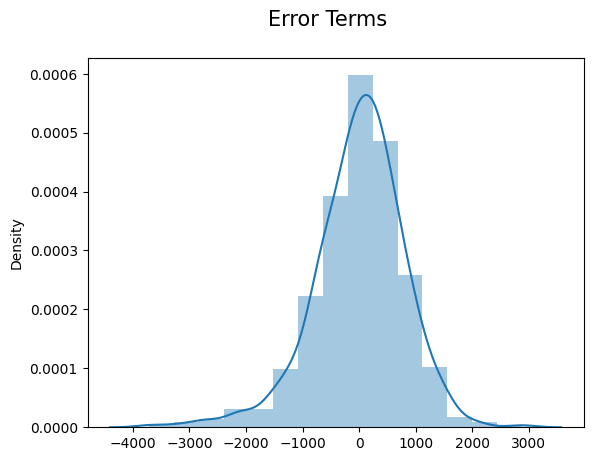

In [ ]:
fig = plt.figure()
sns.distplot(y_train - y_train_pred, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)

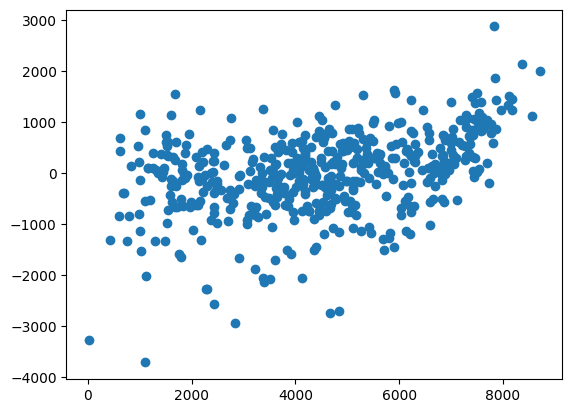

In [ ]:
plt.scatter(y_train,y_train - y_train_pred)
plt.show()

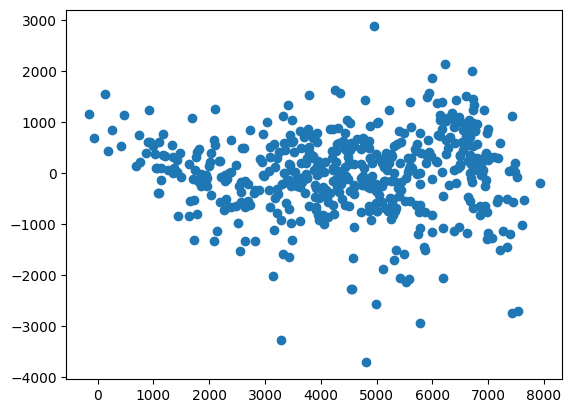

In [ ]:
plt.scatter(y_train_pred,y_train - y_train_pred)
plt.show()

## Making Predictions Using Test Data

In [ ]:
y_test_pred = lr_model.predict(X_test_sm)

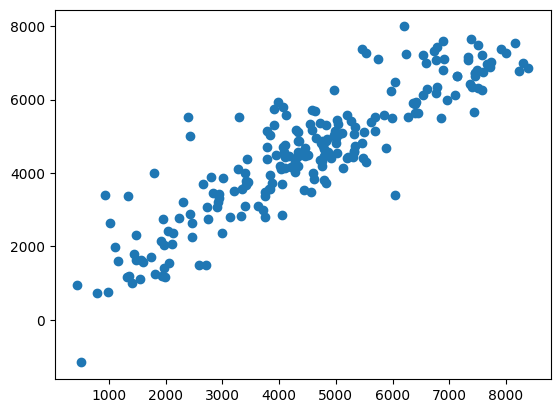

In [ ]:
plt.scatter(y_test,y_test_pred)
plt.show()

### R - Square

In [ ]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))

Train: 0.831 Test: 0.799
